해변 이름	위도 (Latitude)	경도 (Longitude)
강화여차리	37.7000° N	126.4000° E
안산말부흥	37.2000° N	126.7000° E
태안백리포	36.8000° N	126.2000° E
보령석대도	36.3000° N	126.5000° E
부안변산	35.7000° N	126.6000° E
신안임자도	35.1000° N	126.1000° E
진도하조도	34.4000° N	126.1000° E
해남묵동리	34.5000° N	126.5000° E
고흥신흥	34.6000° N	127.3000° E
여수반월	34.7000° N	127.8000° E
사천아두도	34.9000° N	128.1000° E
통영망일봉	34.8000° N	128.4000° E
마산봉암	35.2000° N	128.6000° E
부산해양대	35.1000° N	129.1000° E
울산대왕암	35.5000° N	129.4000° E
포항칠포	36.1000° N	129.4000° E
울진후정	36.9000° N	129.4000° E
강릉송정	37.8000° N	128.9000° E
속초청초	38.2000° N	128.6000° E
인천백령도	37.9500° N	124.7000° E
인천영종도	37.5000° N	126.5000° E
인천영흥도	37.2500° N	126.5000° E
태안안면도	36.5000° N	126.3000° E
서천다사항	36.0000° N	126.5000° E
고창동호	35.4000° N	126.5000° E
영광백바위	35.3000° N	126.4000° E
신안고장	34.8000° N	126.1000° E
해남예락	34.5000° N	126.5000° E
해남송평	34.6000° N	126.5000° E
제주김녕리	33.5500° N	126.8000° E
완도신지도	34.3000° N	126.8000° E
여수백야도	34.6000° N	127.7000° E
고흥염포	34.5000° N	127.3000° E
남해유구	34.8000° N	127.9000° E
거제두모	34.9000° N	128.6000° E
울주나사리	35.4000° N	129.3000° E
동해노봉	37.5000° N	129.1000° E
영덕고래불	36.5000° N	129.4000° E
포항구룡포	35.9000° N	129.6000° E
제주사계리	33.2000° N	126.3000° E
고성하일	34.9000° N	128.3000° E
군산선유도	35.8000° N	126.4000° E
당진석문	37.0000° N	126.5000° E
보령삽시도	36.4000° N	126.4000° E
부산가덕도	35.0000° N	128.8000° E
부산일광	35.3000° N	129.3000° E
시흥정왕	37.3000° N	126.7000° E
신안압해도	34.8000° N	126.3000° E
신안우이도	35.0000° N	125.9000° E
신안흑산도	34.7000° N	125.4000° E
여수거문도	34.0000° N	127.3000° E
여수안도	34.5000° N	127.6000° E
완도보길도	34.2000° N	126.5000° E
완도평일도	34.3000° N	127.0000° E
울릉현포	37.5000° N	130.8000° E
울산주전	35.6000° N	129.5000° E
제주위미	33.3000° N	126.6000° E
진도가사도	34.3000° N	126.3000° E
통영욕지도	34.6000° N	128.3000° E
화성서신	37.1000° N	126.7000° E


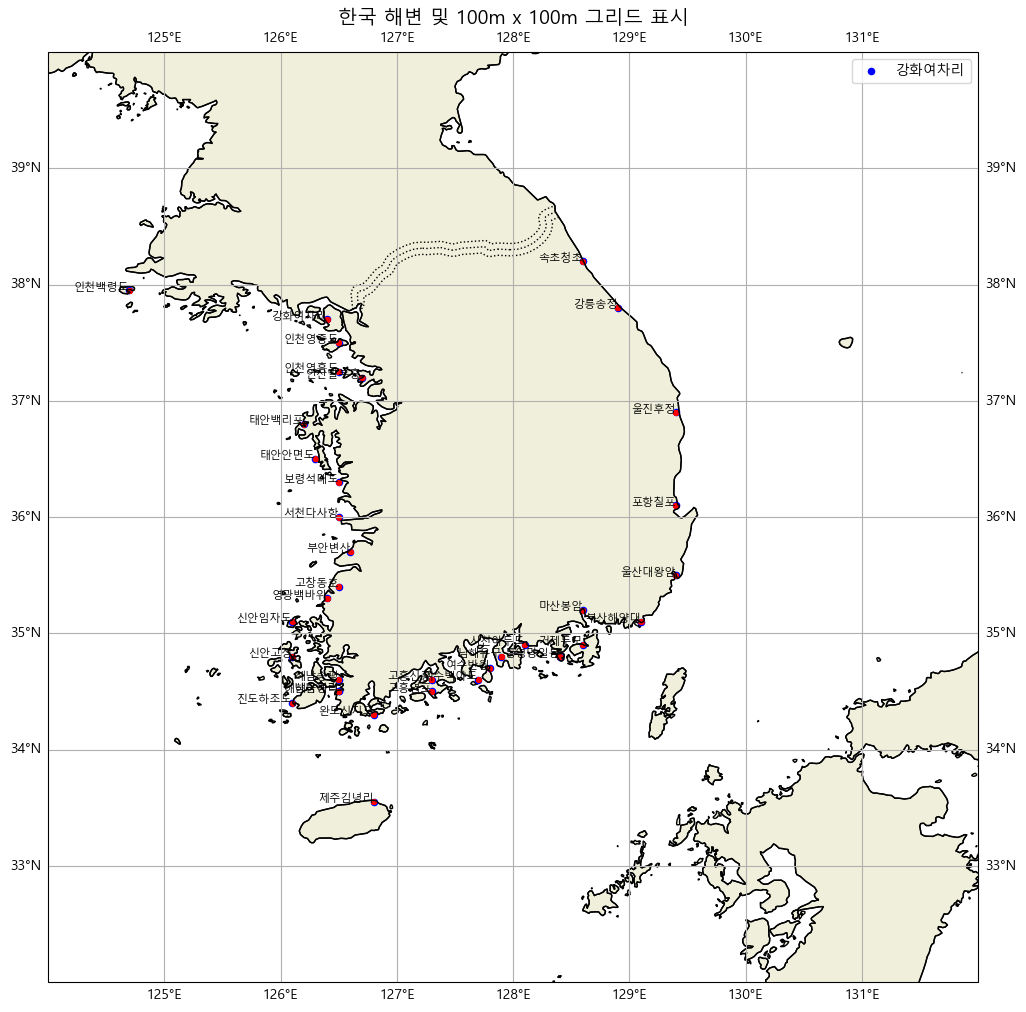

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows의 경우
plt.rc('axes', unicode_minus=False)

# 해변 좌표 리스트 (40개 해변 포함)
beaches = {
    "강화여차리": (37.7000, 126.4000), "안산말부흥": (37.2000, 126.7000), "태안백리포": (36.8000, 126.2000), "보령석대도": (36.3000, 126.5000), "부안변산": (35.7000, 126.6000),
    "신안임자도": (35.1000, 126.1000), "진도하조도": (34.4000, 126.1000), "해남묵동리": (34.5000, 126.5000), "고흥신흥": (34.6000, 127.3000), "여수반월": (34.7000, 127.8000),
    "사천아두도": (34.9000, 128.1000), "통영망일봉": (34.8000, 128.4000), "마산봉암": (35.2000, 128.6000), "부산해양대": (35.1000, 129.1000), "울산대왕암": (35.5000, 129.4000),
    "포항칠포": (36.1000, 129.4000), "울진후정": (36.9000, 129.4000), "강릉송정": (37.8000, 128.9000), "속초청초": (38.2000, 128.6000), "인천백령도": (37.9500, 124.7000),
    "인천영종도": (37.5000, 126.5000), "인천영흥도": (37.2500, 126.5000), "태안안면도": (36.5000, 126.3000), "서천다사항": (36.0000, 126.5000), "고창동호": (35.4000, 126.5000),
    "영광백바위": (35.3000, 126.4000), "신안고장": (34.8000, 126.1000), "해남예락": (34.5000, 126.5000), "해남송평": (34.6000, 126.5000), "제주김녕리": (33.5500, 126.8000),
    "완도신지도": (34.3000, 126.8000), "여수백야도": (34.6000, 127.7000), "고흥염포": (34.5000, 127.3000), "남해유구": (34.8000, 127.9000), "거제두모": (34.9000, 128.6000)
}

# 지구 반지름 (m)
R = 6378137

def generate_grid(center_lat, center_lon, grid_size=100, grid_count=5):
    dlat = (grid_size / R) * (180 / np.pi)
    dlon = (grid_size / R) * (180 / np.pi) / np.cos(center_lat * np.pi/180)
    grid_points = [(center_lat + i * dlat, center_lon + j * dlon) for i in range(-grid_count, grid_count + 1) for j in range(-grid_count, grid_count + 1)]
    return grid_points

# 지도 설정
fig, ax = plt.subplots(figsize=(12, 14), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([124, 132, 32, 40], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# 해변 위치 표시
for beach, (lat, lon) in beaches.items():
    ax.scatter(lon, lat, marker='o', color='blue', s=20, transform=ccrs.PlateCarree(), label=beach if beach == list(beaches.keys())[0] else "")
    ax.text(lon, lat, beach, fontsize=8, ha='right', transform=ccrs.PlateCarree())

# 해변 주변 100m x 100m 격자 표시
for beach, (lat, lon) in beaches.items():
    grid_points = generate_grid(lat, lon)
    grid_lats, grid_lons = zip(*grid_points)
    ax.scatter(grid_lons, grid_lats, marker='s', color='red', s=3, alpha=0.7, transform=ccrs.PlateCarree())

plt.title("한국 해변 및 100m x 100m 그리드 표시", fontsize=14)
plt.legend()
plt.show()


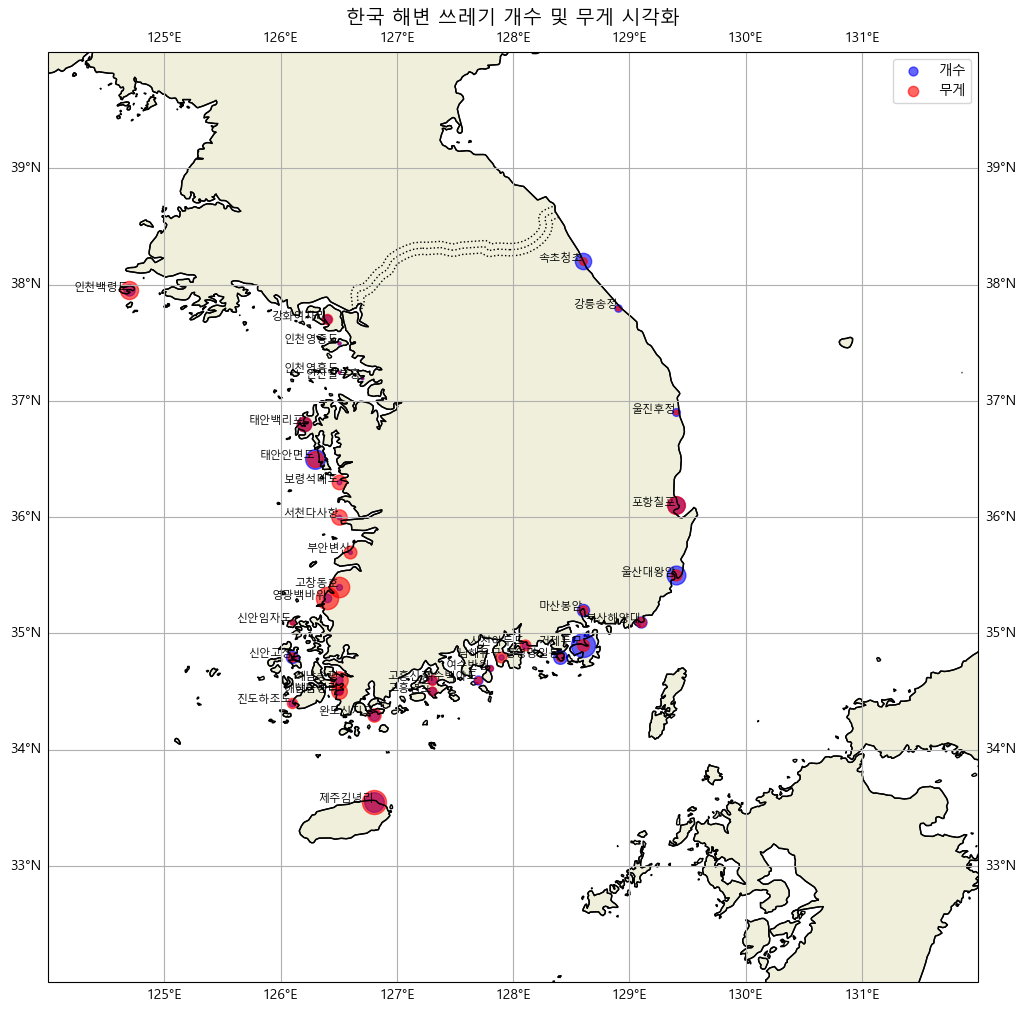

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows의 경우
plt.rc('axes', unicode_minus=False)

# 해변 좌표 리스트 (40개 해변 포함)
beaches = {
    "강화여차리": (37.7000, 126.4000), "안산말부흥": (37.2000, 126.7000), "태안백리포": (36.8000, 126.2000), "보령석대도": (36.3000, 126.5000), "부안변산": (35.7000, 126.6000),
    "신안임자도": (35.1000, 126.1000), "진도하조도": (34.4000, 126.1000), "해남묵동리": (34.5000, 126.5000), "고흥신흥": (34.6000, 127.3000), "여수반월": (34.7000, 127.8000),
    "사천아두도": (34.9000, 128.1000), "통영망일봉": (34.8000, 128.4000), "마산봉암": (35.2000, 128.6000), "부산해양대": (35.1000, 129.1000), "울산대왕암": (35.5000, 129.4000),
    "포항칠포": (36.1000, 129.4000), "울진후정": (36.9000, 129.4000), "강릉송정": (37.8000, 128.9000), "속초청초": (38.2000, 128.6000), "인천백령도": (37.9500, 124.7000),
    "인천영종도": (37.5000, 126.5000), "인천영흥도": (37.2500, 126.5000), "태안안면도": (36.5000, 126.3000), "서천다사항": (36.0000, 126.5000), "고창동호": (35.4000, 126.5000),
    "영광백바위": (35.3000, 126.4000), "신안고장": (34.8000, 126.1000), "해남예락": (34.5000, 126.5000), "해남송평": (34.6000, 126.5000), "제주김녕리": (33.5500, 126.8000),
    "완도신지도": (34.3000, 126.8000), "여수백야도": (34.6000, 127.7000), "고흥염포": (34.5000, 127.3000), "남해유구": (34.8000, 127.9000), "거제두모": (34.9000, 128.6000)
}

# 엑셀 데이터를 딕셔너리로 저장 (모든 데이터 반영)
data = {
    "강화여차리": (511, 25.1), "안산말부흥": (50, 0.5), "태안백리포": (1359, 49.8), "보령석대도": (138, 50.1), "부안변산": (97, 39),
    "신안임자도": (119, 7.1), "진도하조도": (309, 24.9), "해남묵동리": (221, 15.4), "고흥신흥": (452, 23.2), "여수반월": (246, 6.8),
    "사천아두도": (325, 28.3), "통영망일봉": (1215, 16), "마산봉암": (965, 19.6), "부산해양대": (800, 22.9), "울산대왕암": (2280, 27.7),
    "포항칠포": (1937, 75.8), "울진후정": (395, 4.9), "강릉송정": (350, 4.9), "속초청초": (1725, 13.5), "인천백령도": (812, 78),
    "인천영종도": (74, 1), "인천영흥도": (46, 0.7), "태안안면도": (2502, 60), "서천다사항": (131, 56.1), "고창동호": (229, 99.2),
    "영광백바위": (442, 117.3), "신안고장": (971, 20), "해남예락": (292, 58.3), "해남송평": (327, 71.9), "제주김녕리": (2494, 137.6),
    "완도신지도": (743, 42.5), "여수백야도": (525, 11.6), "고흥염포": (435, 18.3), "남해유구": (188, 26.5), "거제두모": (3746, 33.8)
}

# 지도 설정
fig, ax = plt.subplots(figsize=(12, 14), subplot_kw={'projection': ccrs.PlateCarree()})
ax.set_extent([124, 132, 32, 40], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND, edgecolor='black')
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.gridlines(draw_labels=True)

# 개수 및 무게에 따라 크기 조절
max_count = max([v[0] for v in data.values()])
max_weight = max([v[1] for v in data.values()])

# 해변 위치 및 원 표시
for beach, (lat, lon) in beaches.items():
    if beach in data:
        count, weight = data[beach]
        count_size = (count / max_count) * 300  # 개수 기준 원 크기
        weight_size = (weight / max_weight) * 300  # 무게 기준 원 크기
        ax.scatter(lon, lat, marker='o', color='blue', s=count_size, alpha=0.6, transform=ccrs.PlateCarree(), label="개수" if beach == list(data.keys())[0] else "")
        ax.scatter(lon, lat, marker='o', color='red', s=weight_size, alpha=0.6, transform=ccrs.PlateCarree(), label="무게" if beach == list(data.keys())[0] else "")
        ax.text(lon, lat, beach, fontsize=8, ha='right', transform=ccrs.PlateCarree())

plt.title("한국 해변 쓰레기 개수 및 무게 시각화", fontsize=14)
plt.legend()
plt.show()


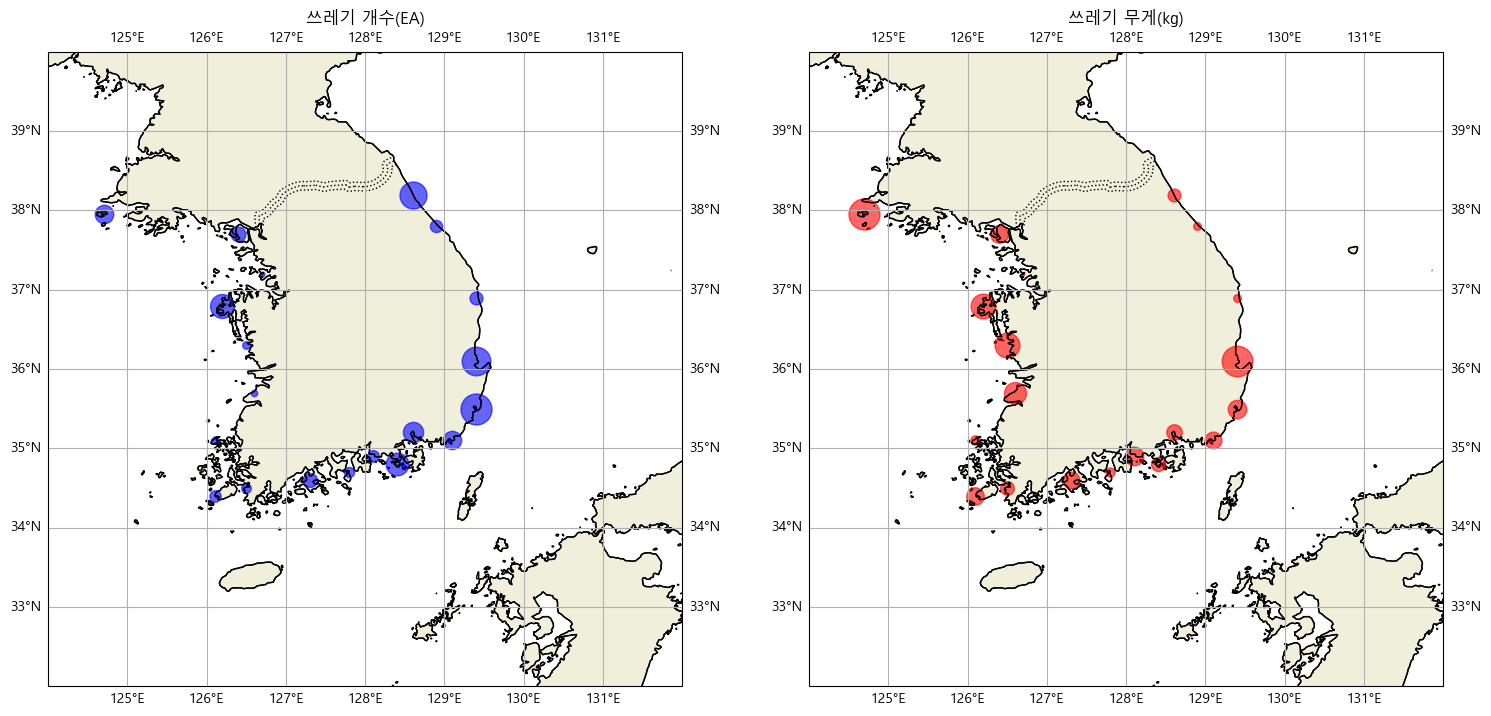

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows의 경우
plt.rc('axes', unicode_minus=False)

# 해변 좌표 리스트 (40개 해변 포함)
beaches = {
    "강화여차리": (37.7000, 126.4000), "안산말부흥": (37.2000, 126.7000), "태안백리포": (36.8000, 126.2000), "보령석대도": (36.3000, 126.5000), "부안변산": (35.7000, 126.6000),
    "신안임자도": (35.1000, 126.1000), "진도하조도": (34.4000, 126.1000), "해남묵동리": (34.5000, 126.5000), "고흥신흥": (34.6000, 127.3000), "여수반월": (34.7000, 127.8000),
    "사천아두도": (34.9000, 128.1000), "통영망일봉": (34.8000, 128.4000), "마산봉암": (35.2000, 128.6000), "부산해양대": (35.1000, 129.1000), "울산대왕암": (35.5000, 129.4000),
    "포항칠포": (36.1000, 129.4000), "울진후정": (36.9000, 129.4000), "강릉송정": (37.8000, 128.9000), "속초청초": (38.2000, 128.6000), "인천백령도": (37.9500, 124.7000),
    "인천영종도": (37.5000, 126.5000), "인천영흥도": (37.2500, 126.5000), "태안안면도": (36.5000, 126.3000), "서천다사항": (36.0000, 126.5000), "고창동호": (35.4000, 126.5000),
    "영광백바위": (35.3000, 126.4000), "신안고장": (34.8000, 126.1000), "해남예락": (34.5000, 126.5000), "해남송평": (34.6000, 126.5000), "제주김녕리": (33.5500, 126.8000),
    "완도신지도": (34.3000, 126.8000), "여수백야도": (34.6000, 127.7000), "고흥염포": (34.5000, 127.3000), "남해유구": (34.8000, 127.9000), "거제두모": (34.9000, 128.6000)
}

# 엑셀 데이터를 딕셔너리로 저장 (모든 데이터 반영)
data = {
    "강화여차리": (511, 25.1), "안산말부흥": (50, 0.5), "태안백리포": (1359, 49.8), "보령석대도": (138, 50.1), "부안변산": (97, 39),
    "신안임자도": (119, 7.1), "진도하조도": (309, 24.9), "해남묵동리": (221, 15.4), "고흥신흥": (452, 23.2), "여수반월": (246, 6.8),
    "사천아두도": (325, 28.3), "통영망일봉": (1215, 16), "마산봉암": (965, 19.6), "부산해양대": (800, 22.9), "울산대왕암": (2280, 27.7),
    "포항칠포": (1937, 75.8), "울진후정": (395, 4.9), "강릉송정": (350, 4.9), "속초청초": (1725, 13.5), "인천백령도": (812, 78)
}

# 지도 설정
fig, axes = plt.subplots(1, 2, figsize=(18, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes[0].set_title("쓰레기 개수(EA)")
axes[1].set_title("쓰레기 무게(㎏)")

for ax in axes:
    ax.set_extent([124, 132, 32, 40], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True)

# 최대값 구하기
max_count = max([v[0] for v in data.values()])
max_weight = max([v[1] for v in data.values()])

# 시각화
for beach, (lat, lon) in beaches.items():
    if beach in data:
        count, weight = data[beach]
        count_size = (count / max_count) * 500  # 크기 조정
        weight_size = (weight / max_weight) * 500
        axes[0].scatter(lon, lat, marker='o', color='blue', s=count_size, alpha=0.6, transform=ccrs.PlateCarree())
        axes[1].scatter(lon, lat, marker='o', color='red', s=weight_size, alpha=0.6, transform=ccrs.PlateCarree())
        
plt.show()

# 위의 40개의 대표적인 해안의 위치 외의 대한민국 관리 전 해수욕장 리스트

출처 : 바다누리 해양정보서비스 (해양수산부)

In [19]:
import pandas as pd

# 엑셀 파일 불러오기 (파일명을 변경하여 사용하세요)
file_path = "해수욕장리스트.xlsx"  # 엑셀 파일 경로
df = pd.read_excel(file_path)

# 데이터 확인
print(df.head())  # 상위 5개 행 출력


         관측소 명      위도       경도
0  38(기사문)해수욕장  38.005  128.731
1       가계해수욕장  34.434  126.354
2      가마미해수욕장  35.398  126.408
3       가사해수욕장  34.370  126.928
4       가진해수욕장  38.373  128.509


In [22]:
# '관측소 명' 컬럼을 리스트로 변환
observatory_list = df['관측소 명'].tolist()

# 5개씩 묶어 출력
for i in range(0, len(observatory_list), 10):
    print(", ".join(observatory_list[i:i+10]))  # 10개씩 출력



38(기사문)해수욕장, 가계해수욕장, 가마미해수욕장, 가사해수욕장, 가진해수욕장, 갈음이해수욕장, 감추해변, 강문해수욕장, 갯마을해수욕장, 거문도해수욕장
거진11리해수욕장, 거진1리해수욕장, 격포해수욕장, 경정해수욕장, 경포대해수욕장, 계남해수욕장, 고래불해변, 고불개해수욕장, 고사포해수욕장, 고포해수욕장
곰섬해수욕장, 공현진1리해수욕장, 공현진2리해수욕장, 곽지과물해수욕장, 관매도해수욕장, 관성솔밭해변, 광안리해수욕장, 광암해수욕장, 광진해수욕장, 교암해수욕장
구례포해수욕장, 구룡포해수욕장, 구름포해수욕장, 구리동해수욕장, 구산해수욕장, 구시포해수욕장, 구영해수욕장, 구조라해수욕장, 국화리해수욕장, 굴업해수욕장
궁촌해수욕장, 궁평리해수욕장, 금갑해수욕장, 금곡해수욕장, 금능해수욕장, 금일명사십리해수욕장, 금장해수욕장, 금진해수욕장, 기성망양해수욕장, 기지포해수욕장
김녕해수욕장, 꽃지해수욕장, 꾸지나무골해수욕장, 나곡해수욕장, 나로우주해수욕장, 나정고운모래해수욕장, 낙산해수욕장, 난지섬해수욕장, 남애1해수욕장, 남애3해수욕장
남열해돋이해수욕장, 남일대해수욕장, 남항진해수욕장, 남호해수욕장, 낭도해수욕장, 노봉해수욕장, 논짓물해변, 농소해수욕장, 다대포해수욕장, 달산포해수욕장
대광해수욕장, 대전해수욕장, 대진1리해수욕장, 대진5리해수욕장, 대진해수욕장, 대진해수욕장, 대천해수욕장, 대풍해수욕장, 덕동해수욕장, 덕산해수욕장
덕원해수욕장, 덕포해수욕장, 덕흥해수욕장, 도구해수욕장, 도직해수욕장, 돈목해수욕장, 돌머리해수욕장, 동고해수욕장, 동막해수욕장, 동산포해수욕장
동산해수욕장, 동호해수욕장, 동호해수욕장, 두곡월포해수욕장, 두여해수욕장, 등대해수욕장, 등명해수욕장, 떼뿌루해수욕장, 마검포해수욕장, 마차진해수욕장
만리포해수욕장, 만성리검은모래해수욕장, 만성리해수욕장, 망상오토캠핑리조트해수욕장, 망상해수욕장, 망양정해수욕장, 망치해수욕장, 맹방해수욕장, 명사해수욕장, 명파해수욕장
모래울, 모사금해수욕장, 모진이해수욕장, 모항해수욕장, 몽산포해수욕장, 무슬목해수욕장,

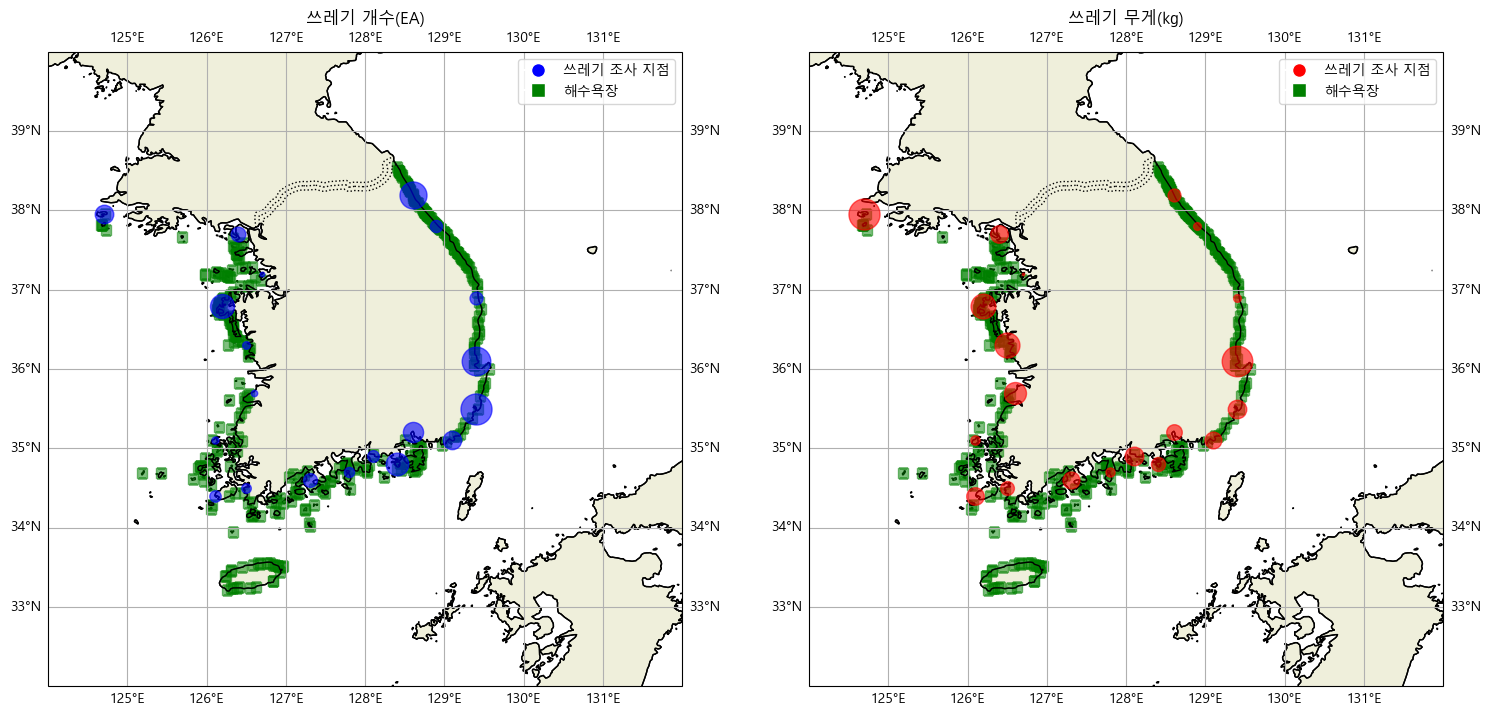

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.font_manager as fm

# 한글 폰트 설정
plt.rc('font', family='Malgun Gothic')  # Windows의 경우
plt.rc('axes', unicode_minus=False)

# 해변 좌표 리스트 (40개 해변 포함)
beaches = {
    "강화여차리": (37.7000, 126.4000), "안산말부흥": (37.2000, 126.7000), "태안백리포": (36.8000, 126.2000), "보령석대도": (36.3000, 126.5000), "부안변산": (35.7000, 126.6000),
    "신안임자도": (35.1000, 126.1000), "진도하조도": (34.4000, 126.1000), "해남묵동리": (34.5000, 126.5000), "고흥신흥": (34.6000, 127.3000), "여수반월": (34.7000, 127.8000),
    "사천아두도": (34.9000, 128.1000), "통영망일봉": (34.8000, 128.4000), "마산봉암": (35.2000, 128.6000), "부산해양대": (35.1000, 129.1000), "울산대왕암": (35.5000, 129.4000),
    "포항칠포": (36.1000, 129.4000), "울진후정": (36.9000, 129.4000), "강릉송정": (37.8000, 128.9000), "속초청초": (38.2000, 128.6000), "인천백령도": (37.9500, 124.7000),
    "인천영종도": (37.5000, 126.5000), "인천영흥도": (37.2500, 126.5000), "태안안면도": (36.5000, 126.3000), "서천다사항": (36.0000, 126.5000), "고창동호": (35.4000, 126.5000),
    "영광백바위": (35.3000, 126.4000), "신안고장": (34.8000, 126.1000), "해남예락": (34.5000, 126.5000), "해남송평": (34.6000, 126.5000), "제주김녕리": (33.5500, 126.8000),
    "완도신지도": (34.3000, 126.8000), "여수백야도": (34.6000, 127.7000), "고흥염포": (34.5000, 127.3000), "남해유구": (34.8000, 127.9000), "거제두모": (34.9000, 128.6000)
}

# 엑셀 데이터를 딕셔너리로 저장 (모든 데이터 반영)
data = {
    "강화여차리": (511, 25.1), "안산말부흥": (50, 0.5), "태안백리포": (1359, 49.8), "보령석대도": (138, 50.1), "부안변산": (97, 39),
    "신안임자도": (119, 7.1), "진도하조도": (309, 24.9), "해남묵동리": (221, 15.4), "고흥신흥": (452, 23.2), "여수반월": (246, 6.8),
    "사천아두도": (325, 28.3), "통영망일봉": (1215, 16), "마산봉암": (965, 19.6), "부산해양대": (800, 22.9), "울산대왕암": (2280, 27.7),
    "포항칠포": (1937, 75.8), "울진후정": (395, 4.9), "강릉송정": (350, 4.9), "속초청초": (1725, 13.5), "인천백령도": (812, 78)
}

# 지도 설정
fig, axes = plt.subplots(1, 2, figsize=(18, 10), subplot_kw={'projection': ccrs.PlateCarree()})
axes[0].set_title("쓰레기 개수(EA)")
axes[1].set_title("쓰레기 무게(㎏)")

for ax in axes:
    ax.set_extent([124, 132, 32, 40], crs=ccrs.PlateCarree())
    ax.add_feature(cfeature.LAND, edgecolor='black')
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=':')
    ax.gridlines(draw_labels=True)

# 최대값 구하기
max_count = max([v[0] for v in data.values()])
max_weight = max([v[1] for v in data.values()])

for ax in axes:
    ax.scatter(df['경도'], df['위도'], 
              marker='s',  
              color='green',  
              s=50,  
              alpha=0.5,  
              transform=ccrs.PlateCarree(),
              label='해수욕장',
              zorder=1)  # 낮은 zorder 값

# 그 다음 쓰레기 조사지점 표시 (zorder=2)
for beach, (lat, lon) in beaches.items():
    if beach in data:
        count, weight = data[beach]
        count_size = (count / max_count) * 500
        weight_size = (weight / max_weight) * 500
        axes[0].scatter(lon, lat, marker='o', color='blue', s=count_size, alpha=0.6, 
                       transform=ccrs.PlateCarree(), zorder=2)  # 높은 zorder 값
        axes[1].scatter(lon, lat, marker='o', color='red', s=weight_size, alpha=0.6, 
                       transform=ccrs.PlateCarree(), zorder=2)  # 높은 zorder 값

# 범례 부분 수정
legend_elements_left = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', 
           label='쓰레기 조사 지점', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='green', 
           label='해수욕장', markersize=10)
]

legend_elements_right = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='red', 
           label='쓰레기 조사 지점', markersize=10),
    Line2D([0], [0], marker='s', color='w', markerfacecolor='green', 
           label='해수욕장', markersize=10)
]

# 각 지도에 맞는 범례 적용
axes[0].legend(handles=legend_elements_left, loc='upper right')
axes[1].legend(handles=legend_elements_right, loc='upper right')

plt.show()

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 생성
data = {
    '지역': ['강화여차리', '안산말부흥', '태안백리포', '보령석대도', '부안변산', '신안임자도', '진도하조도', '해남묵동리', 
             '고흥신흥', '여수반월', '사천아두도', '통영망일봉', '마산봉암', '부산해양대', '울산대왕암', '포항칠포', 
             '울진후정', '강릉송정', '속초청초', '인천백령도', '인천영종도', '인천영흥도', '태안안면도', '서천다사항', 
             '고창동호', '영광백바위', '신안고장', '해남예락', '해남송평', '제주김녕리', '완도신지도', '여수백야도', 
             '고흥염포', '남해유구', '거제두모', '울주나사리', '동해노봉', '영덕고래불', '포항구룡포', '제주사계리', 
             '고성하일', '군산선유도', '당진석문', '보령삽시도', '부산가덕도', '부산일광', '시흥정왕', '신안압해도', 
             '신안우이도', '신안흑산도', '여수거문도', '여수안도', '완도보길도', '완도평일도', '울릉현포', '울산주전', 
             '제주위미', '진도가사도', '통영욕지도', '화성서신'],
    '개수': [511, 50, 1359, 138, 97, 119, 309, 221, 452, 246, 325, 1215, 965, 800, 2280, 1937, 395, 350,
            1725, 812, 74, 46, 2502, 131, 229, 442, 971, 292, 327, 2494, 743, 525, 435, 188, 3746, 1158, 
            823, 596, 4064, 827, 1710, 45, 159, 677, 3383, 2675, 790, 1157, 3497, 2733, 4207, 11420, 1693, 
            806, 2287, 1380, 902, 1349, 2563, 124],
    '무게_kg': [25.1, 0.5, 49.8, 50.1, 39, 7.1, 24.9, 15.4, 23.2, 6.8, 28.3, 16, 19.6, 22.9, 27.7, 75.8, 
               4.9, 4.9, 13.5, 78, 1, 0.7, 60, 56.1, 99.2, 117.3, 20, 58.3, 71.9, 137.6, 42.5, 11.6, 18.3, 
               26.5, 33.8, 46, 18.3, 9.8, 87, 18.8, 21.8, 3.8, 1.8, 5.1, 52.1, 36.2, 4.8, 98.9, 1238, 219.8, 
               74.4, 253.5, 38.4, 85, 250.5, 13.6, 14.8, 225, 47.9, 1.5]
}

df = pd.DataFrame(data)

# 데이터 기본 정보 확인
print(f"데이터 크기: {df.shape}")
print("\n데이터 첫 5개 행:")
print(df.head())
print("\n기술 통계량:")
print(df.describe())

데이터 크기: (60, 3)

데이터 첫 5개 행:
      지역    개수  무게_kg
0  강화여차리   511   25.1
1  안산말부흥    50    0.5
2  태안백리포  1359   49.8
3  보령석대도   138   50.1
4   부안변산    97   39.0

기술 통계량:
                 개수        무게_kg
count     60.000000    60.000000
mean    1307.933333    69.251667
std     1727.830489   164.594841
min       45.000000     0.500000
25%      304.750000    13.575000
50%      803.000000    27.100000
75%     1713.750000    62.975000
max    11420.000000  1238.000000



개수와 무게 간의 상관계수: 0.36


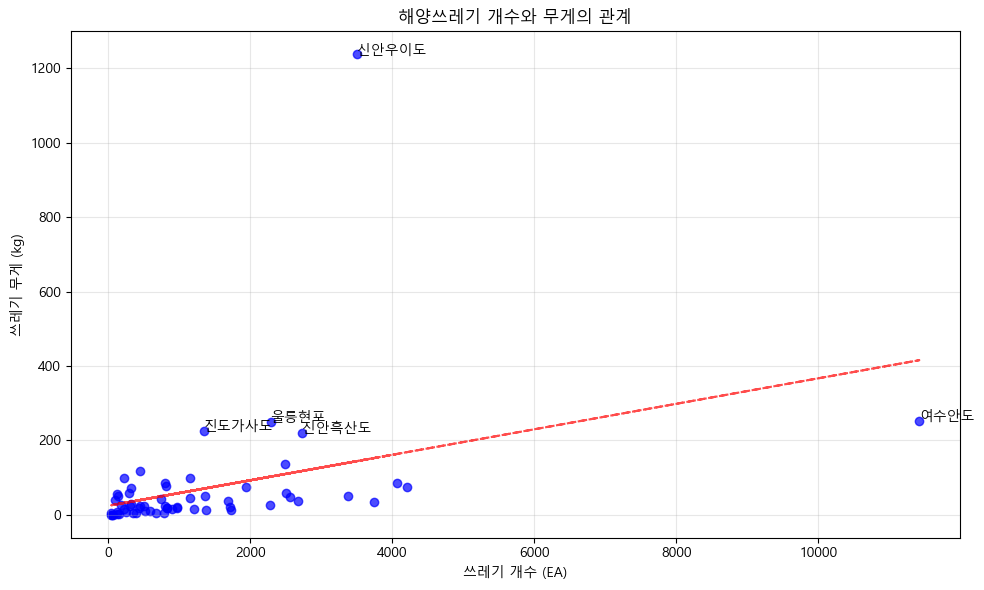


단위 무게 상위 10개 지역:
       지역      단위무게
24   고창동호  0.433188
23  서천다사항  0.428244
4    부안변산  0.402062
3   보령석대도  0.363043
48  신안우이도  0.354018
25  영광백바위  0.265385
28   해남송평  0.219878
27   해남예락  0.199658
57  진도가사도  0.166790
33   남해유구  0.140957

단위 무게 하위 10개 지역:
       지역      단위무게
46   시흥정왕  0.006076
43  보령삽시도  0.007533
18   속초청초  0.007826
34   거제두모  0.009023
55   울산주전  0.009855
1   안산말부흥  0.010000
42   당진석문  0.011321
59   화성서신  0.012097
14  울산대왕암  0.012149
16   울진후정  0.012405


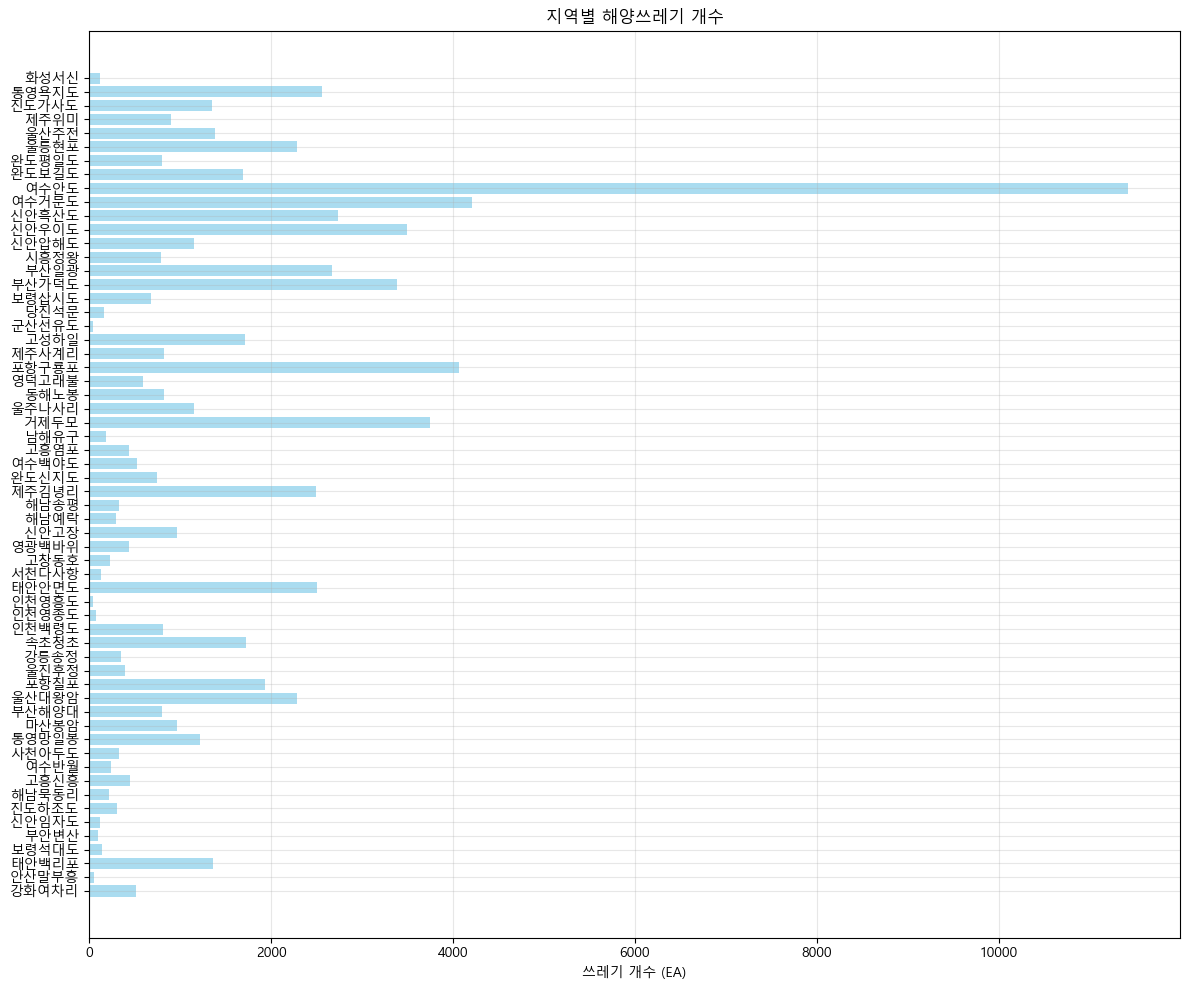

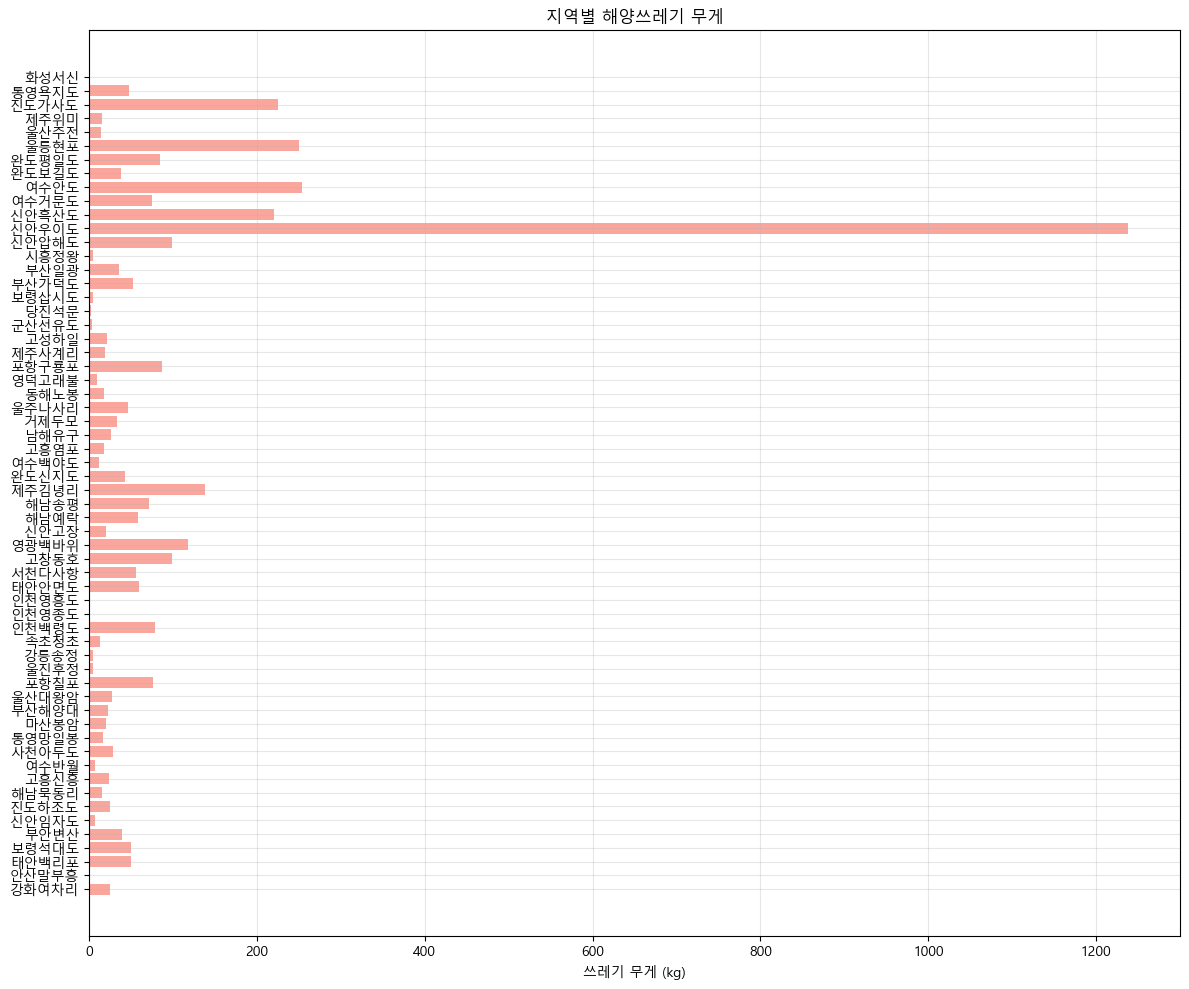

In [4]:
# 개수와 무게 간의 관계 분석
correlation = df['개수'].corr(df['무게_kg'])
print(f"\n개수와 무게 간의 상관계수: {correlation:.2f}")

# 개수와 무게의 산점도
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['개수'], df['무게_kg'], alpha=0.7, c='blue')

# 이상치 식별을 위한 라벨 추가
for i, txt in enumerate(df['지역']):
    if df['무게_kg'][i] > 200 or df['개수'][i] > 5000:
        plt.annotate(txt, (df['개수'][i], df['무게_kg'][i]))

plt.title('해양쓰레기 개수와 무게의 관계')
plt.xlabel('쓰레기 개수 (EA)')
plt.ylabel('쓰레기 무게 (kg)')
plt.grid(True, alpha=0.3)

# 추세선 추가
z = np.polyfit(df['개수'], df['무게_kg'], 1)
p = np.poly1d(z)
plt.plot(df['개수'], p(df['개수']), "r--", alpha=0.7)

plt.tight_layout()
plt.show()

# 단위 무게 계산 (개당 평균 무게)
df['단위무게'] = df['무게_kg'] / df['개수']
print("\n단위 무게 상위 10개 지역:")
print(df.sort_values('단위무게', ascending=False)[['지역', '단위무게']].head(10))
print("\n단위 무게 하위 10개 지역:")
print(df.sort_values('단위무게')[['지역', '단위무게']].head(10))

# 지역별 해양쓰레기 개수와 무게의 분포
plt.figure(figsize=(12, 10))
plt.barh(df['지역'], df['개수'], color='skyblue', alpha=0.7, label='개수')
plt.title('지역별 해양쓰레기 개수')
plt.xlabel('쓰레기 개수 (EA)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 10))
plt.barh(df['지역'], df['무게_kg'], color='salmon', alpha=0.7, label='무게')
plt.title('지역별 해양쓰레기 무게')
plt.xlabel('쓰레기 무게 (kg)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

보고서 정독 결과 6차 조사는 각각 2023년 1/31, 3/31, 5/31, 7/31, 9/30, 11/30 에 이루어진 것을 알 수 있다.  
더 신뢰성 높은 모델링을 위해 조사일 이전 일정 기간의 선박밀집도를 고려한다. (각 조사일 이전 30일 데이터의 평균 사용 )

In [ ]:
# 예시: 각 조사일 이전 30일 데이터의 평균 사용
survey_dates = ['2023-01-31', '2023-03-31', '2023-05-31', 
                '2023-07-31', '2023-09-30', '2023-11-30']

location_density_values = {}

for location in locations:
    location_values = []
    
    for survey_date in survey_dates:
        survey_date = pd.to_datetime(survey_date)
        start_date = survey_date - pd.DateOffset(days=30)
        
        # 해당 위치, 해당 기간의 선박밀집도 데이터 필터링
        filtered_data = ship_density_data[
            (ship_density_data['location'] == location) & 
            (ship_density_data['date'] >= start_date) & 
            (ship_density_data['date'] <= survey_date)
        ]
        
        # 평균 계산
        avg_density = filtered_data['density'].mean()
        location_values.append(avg_density)
    
    # 6회 조사 데이터의 평균 계산
    location_density_values[location] = np.mean(location_values)

최근 데이터에 더 높은 가중치를 부여하는 방식을 고려할 수 있다. - 이래야 한다고 생각한다.

In [ ]:
# 예시: 각 조사일 이전 60일 데이터의 가중 이동 평균 사용
for survey_date in survey_dates:
    survey_date = pd.to_datetime(survey_date)
    start_date = survey_date - pd.DateOffset(days=60)
    
    # 해당 위치, 해당 기간의 선박밀집도 데이터 필터링
    filtered_data = ship_density_data[
        (ship_density_data['location'] == location) & 
        (ship_density_data['date'] >= start_date) & 
        (ship_density_data['date'] <= survey_date)
    ]
    
    # 날짜별 가중치 계산 (최근 날짜에 더 높은 가중치)
    filtered_data['days_before'] = (survey_date - filtered_data['date']).dt.days
    filtered_data['weight'] = np.exp(-0.05 * filtered_data['days_before'])  # 지수 감소 가중치
    
    # 가중 평균 계산
    weighted_avg = (filtered_data['density'] * filtered_data['weight']).sum() / filtered_data['weight'].sum()